## Project Stage - II (Data Modeling and Hypothesis Testing)

## Goals

The goal of Stage II is to develop formal hypothesis tests for the intuitions you had in Stage I and utilize statistical modeling to prove/disprove them.

### Tasks:

#### Task 1: (50 pts)
- Team: (25)
    - Compare the weekly statistics (mean, median, mode) for number of new cases and deaths across US. You are calculating mean (rounded to integer value) number of new cases and per week and then calculating (mean, median, mode) for all week taken together. 
    - Compare the data against other countries of the world. Data at: https://ourworldindata.org/coronavirus-source-data
        - Choose atleast 5 similar populations countries to compare. 
    - Plot daily trends (cases and deaths) of US and compare other countries. Utilize aggregrate, normalized by population, difference in cases (new cases), and log normalized values. 
    - Identify peak week of the cases and deaths in US and other countries. 
- Member: (25 pts)
    - Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state. 
    - Compare the data against other states. (normalize by population)
    - Identify counties within the previous state with high case and death rates. (normalize by population)
    - Plot daily trends (cases and deaths, new cases) of state and top 5 infected counties. Utilize aggregrate, normalized by population, and log normalized values. 


    
#### Task 2: (50 pts)
- Member:
    - Fit a distribution to the number of COVID-19 cases of a state. 
        - Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.
        - Describe why the distribution was choosen and its statistics in the report and the notebook. 
    - Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. For example, Number of new cases and deaths per 100,000 populations. (normalize by population, you can choose a different normalization factor that 100,000)
    - Model poission distributions for North Carolina counties COVID-19 in cases and deaths. For example, Number of new cases and deaths per 100,000 populations. 
    - Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.
        - You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based data to enrichment for correlation. Between states you would need to aggregate to state level data and then perform correlation. 
    - Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against. 
        - For example: *Does higher employment data lead to higher covid case numbers or more rapid increase in covid cases.* 


**Deliverable**
- Report upload on canvas.
- Each member creates separate notebooks for member tasks. Upload all notebooks to Github Repository. 

*PS: Try to use `Plotly` for your charts. Will be useful in Stage IV*

## Deadline: 10/22/2020

## Import Libraries

In [653]:
# installing chart-studio library for using plotly
! pip install chart-studio

You should consider upgrading via the '/Applications/anaconda3/envs/projectenv/bin/python -m pip install --upgrade pip' command.


## Import libraries

In [654]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import cufflinks as cf
# import plotly.plotly as py
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.graph_objs as go
from datetime import datetime
import scipy as sc
from scipy.stats.distributions import poisson
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import kurtosis,skew,poisson
import statistics as st
import plotly.io as pio
from IPython.display import Image

## Set credentials for using plotly

In [655]:
tls.set_credentials_file(username='ritupandey1', api_key='xfclHpjv0I99MaxeDKN5')

## Read merged COVID19 csv file 

In [656]:
# COVID-19 dataset
COVID19 = "../Data/Output/Merged_COVID19_file.csv"
merged_COVID19 = pd.read_csv(COVID19)


## Format date into datetime

In [657]:
merged_COVID19['dates'] = pd.to_datetime(merged_COVID19.dates)
merged_COVID19.head()

,countyFIPS,stateFIPS,dates,County Name,State,population,confirmed_cases,deaths
0,0,2,2020-01-22,Statewide Unallocated,AK,0,0,0
1,0,2,2020-01-23,Statewide Unallocated,AK,0,0,0
2,0,2,2020-01-24,Statewide Unallocated,AK,0,0,0
3,0,2,2020-01-25,Statewide Unallocated,AK,0,0,0
4,0,2,2020-01-26,Statewide Unallocated,AK,0,0,0


## Selected state is Virginia
     - New confirmed cases and deaths across Virginia on each day (calculated by using dataframe.diff() method)

In [658]:
# The merged file contains the total confirmed cases and total deaths upto that day.
merged_COVID19_VA = merged_COVID19[merged_COVID19['State']=='VA'].copy()
population_VA = merged_COVID19_VA.groupby('dates')['population'].sum()[1]
print('Population of Virginia is : ',population_VA)

# Find new cases county wise
COVID19_VA_new_cases = merged_COVID19_VA.copy()
COVID19_VA_new_cases['conf_diff'] = merged_COVID19_VA.sort_values(['County Name','dates'])['confirmed_cases'].diff().fillna(0)
COVID19_VA_new_cases['deaths_diff'] = merged_COVID19_VA.sort_values(['County Name','dates'])['deaths'].diff().fillna(0)

# Replace negative values with 0 for conf_diff and deaths_diff
COVID19_VA_new_cases['conf_diff'] = np.where(COVID19_VA_new_cases['conf_diff']<0,0,COVID19_VA_new_cases['conf_diff'])
COVID19_VA_new_cases['deaths_diff'] = np.where(COVID19_VA_new_cases['deaths_diff']<0,0,COVID19_VA_new_cases['deaths_diff'])

COVID19_VA_new_cases

Population of Virginia is :  6802317


,countyFIPS,stateFIPS,dates,County Name,State,population,confirmed_cases,deaths,conf_diff,deaths_diff
10472,0,51,2020-01-22,Statewide Unallocated,VA,0,0,0,0.0,0.0
10473,0,51,2020-01-23,Statewide Unallocated,VA,0,0,0,0.0,0.0
10474,0,51,2020-01-24,Statewide Unallocated,VA,0,0,0,0.0,0.0
10475,0,51,2020-01-25,Statewide Unallocated,VA,0,0,0,0.0,0.0
10476,0,51,2020-01-26,Statewide Unallocated,VA,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
711615,51840,51,2020-09-05,Winchester city,VA,28078,455,4,0.0,0.0
711616,51840,51,2020-09-06,Winchester city,VA,28078,459,4,4.0,0.0
711617,51840,51,2020-09-07,Winchester city,VA,28078,461,4,2.0,0.0
711618,51840,51,2020-09-08,Winchester city,VA,28078,461,4,0.0,0.0


## New confirmed cases and deaths across Virginia on each day (calculated by adding the new cases for each day across counties) (aggregation)

In [659]:
VA_New_Cases_agg  = COVID19_VA_new_cases.groupby('dates').agg(np.sum)[['conf_diff','deaths_diff']].reset_index()
VA_New_Cases_agg.head(240)



,dates,conf_diff,deaths_diff
0,2020-01-22,0.0,0.0
1,2020-01-23,0.0,0.0
2,2020-01-24,0.0,0.0
3,2020-01-25,0.0,0.0
4,2020-01-26,0.0,0.0
...,...,...,...
233,2020-09-11,870.0,3.0
234,2020-09-12,996.0,10.0
235,2020-09-13,683.0,2.0
236,2020-09-14,602.0,16.0


# Task 1 (Member)
## Mean, Median and Mode
## - Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific state.

### Mean/median/Mode calculated for each week and the values rounded

In [660]:
# mean (Dates grouped by a week)
mean_va = VA_New_Cases_agg.groupby(pd.Grouper(key='dates', freq='1W'))['conf_diff','deaths_diff'].mean().add_suffix('_mean')
mean_va = mean_va.round()
mean_va.head(10)


,conf_diff_mean,deaths_diff_mean
dates,,
2020-01-26,0.0,0.0
2020-02-02,0.0,0.0
2020-02-09,0.0,0.0
2020-02-16,0.0,0.0
2020-02-23,0.0,0.0
2020-03-01,0.0,0.0
2020-03-08,0.0,0.0
2020-03-15,4.0,0.0
2020-03-22,21.0,0.0


In [661]:
# Median
median_va = VA_New_Cases_agg.groupby(pd.Grouper(key='dates', freq='W'))['conf_diff','deaths_diff'].median().add_suffix('_median')
median_va = median_va.round()
median_va.head(10)

,conf_diff_median,deaths_diff_median
dates,,
2020-01-26,0.0,0.0
2020-02-02,0.0,0.0
2020-02-09,0.0,0.0
2020-02-16,0.0,0.0
2020-02-23,0.0,0.0
2020-03-01,0.0,0.0
2020-03-08,0.0,0.0
2020-03-15,1.0,0.0
2020-03-22,18.0,0.0


In [662]:
# Mode
mode_va = VA_New_Cases_agg.groupby(pd.Grouper(key='dates', freq='W'))['conf_diff','deaths_diff'].apply(lambda x:x.mode().iloc[0]).add_suffix('_mode')
mode_va.head(12)


,conf_diff_mode,deaths_diff_mode
dates,,
2020-01-26,0.0,0.0
2020-02-02,0.0,0.0
2020-02-09,0.0,0.0
2020-02-16,0.0,0.0
2020-02-23,0.0,0.0
2020-03-01,0.0,0.0
2020-03-08,0.0,0.0
2020-03-15,0.0,0.0
2020-03-22,5.0,0.0


## Merge the weekly mean, median and mode in a single df

In [663]:
# merge the mean, median and mode in a single df
merge_va_all = mean_va.merge(median_va.merge(mode_va,on='dates'),on='dates')
merge_va_all.head(10)

,conf_diff_mean,deaths_diff_mean,conf_diff_median,deaths_diff_median,conf_diff_mode,deaths_diff_mode
dates,,,,,,
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-15,4.0,0.0,1.0,0.0,0.0,0.0
2020-03-22,21.0,0.0,18.0,0.0,5.0,0.0


## Calculated mean/median/mode for the whole state - Virginia (normalized by population per 1,000,000)

In [664]:
# Consolidate mean/median/mode for the whole state - Virginia
mean_va_all = ((VA_New_Cases_agg.mean()/population_VA)*1000000).round()
median_va_all = ((VA_New_Cases_agg.median()/population_VA)*1000000).round()
mode_va_all = VA_New_Cases_agg.mode().iloc[0]
print('Virginia Overall, total population -',population_VA,' \n')
print('Mean of new cases (per 1,000,000 population):\n---------------------\n',mean_va_all)
print('\nMedian of new cases(per 1,000,000 population):\n---------------------\n',median_va_all)
print('\nMode of new cases:\n---------------------\n',mode_va_all)



Virginia Overall, total population - 6802317  

Mean of new cases (per 1,000,000 population):
---------------------
 conf_diff      63.0
deaths_diff     1.0
dtype: float64

Median of new cases(per 1,000,000 population):
---------------------
 conf_diff      69.0
deaths_diff     1.0
dtype: float64

Mode of new cases:
---------------------
 dates          2020-01-22 00:00:00
conf_diff                        0
deaths_diff                      0
Name: 0, dtype: object


## -Compare the data against other states.
   - States like "CT", "MN","KY","NM" and "MI" have similar confirmed cases as "Virginia". States like "AR", "CO", "WV", "ID", "KS" have similar death rates as "Virginia". 
   - VA is not one of the states with high cases/deaths. "LA", "FL" and "MS" are the states with the highest rate of confirmed cases whereas "NJ", "NY" and "MA" are the states with highest deaths. 
   - "NH", "ME" and "VT" are the states with the least confirmed case where "NH" being the exception has relatively higher death rate per 1,000,000 population. 

In [665]:
# Found new cases for each day for each state, grouped by date and state to find the sum for each day in a state. 
# Then found the difference from the previous day count to find the new cases. Caluclated mean/median/ mode for each state.
# Divided the values by the total population of the state (by summing popu for each county) and multiplied by 10000000.
# Displayed them as a dataframe, sorted by confirmed_cases_mean(per 10,000,000 population) and deaths_mean(per 10000000 population) 
data=[]
grouped = merged_COVID19.groupby('State')
for state, group in grouped:
    popu = group.groupby('dates')['population'].sum()[1]
    a1 = group.groupby(['dates'])['confirmed_cases','deaths'].sum().diff()
    mean1 = ((a1.mean()/popu)*1000000).reset_index().round()
    median1 = ((a1.median()/popu)*1000000).reset_index().round()
    mode1 = a1.mode().iloc[0].reset_index()
    data.append([state,mean1.iloc[0,1],median1.iloc[0,1],mode1.iloc[0,1],mean1.iloc[1,1],median1.iloc[1,1],mode1.iloc[1,1]])
df_all_states = pd.DataFrame(data,columns=['State','conf_mean','conf_median','conf_mode','deaths_mean','deaths_median','deaths_mode'])
print('\n\nMean/Median/Mode for new confirmed cases and death rates for each state in the whole US (per 1,000,000).\n')
print('States with highest confirmed cases: \n\n{}\n'.format(df_all_states.sort_values(['conf_mean'],ascending=False).head(5).loc[:,['State','conf_mean','conf_median','conf_mode']]))
print('States with highest deaths: \n\n{}'.format(df_all_states.sort_values(['deaths_mean'],ascending=False).head(5).loc[:,['State','deaths_mean','deaths_median','deaths_mode']]))
df_all_states.sort_values(['conf_mean'],ascending=False)





Mean/Median/Mode for new confirmed cases and death rates for each state in the whole US (per 1,000,000).

States with highest confirmed cases: 

   State  conf_mean  conf_median  conf_mode
18    LA      144.0         89.0        0.0
9     FL      131.0         47.0        0.0
25    MS      128.0         86.0        0.0
1     AL      121.0         65.0        0.0
3     AZ      121.0         43.0        0.0

States with highest deaths: 

   State  deaths_mean  deaths_median  deaths_mode
31    NJ          8.0            1.0          0.0
34    NY          7.0            1.0          0.0
19    MA          6.0            2.0          0.0
18    LA          5.0            4.0          0.0
6     CT          5.0            1.0          0.0


,State,conf_mean,conf_median,conf_mode,deaths_mean,deaths_median,deaths_mode
18,LA,144.0,89.0,0.0,5.0,4.0,0.0
9,FL,131.0,47.0,0.0,3.0,2.0,0.0
25,MS,128.0,86.0,0.0,4.0,3.0,0.0
1,AL,121.0,65.0,0.0,2.0,1.0,0.0
3,AZ,121.0,43.0,0.0,3.0,1.0,0.0
10,GA,118.0,76.0,0.0,3.0,2.0,0.0
40,SC,109.0,44.0,0.0,3.0,1.0,0.0
42,TN,108.0,59.0,0.0,1.0,1.0,0.0
33,NV,101.0,46.0,0.0,2.0,1.0,0.0
12,IA,101.0,91.0,0.0,2.0,1.0,0.0


## -Identify counties with high case and death rates (normalize by population).

### - Grouping the data for Virginia(VA) state by "County Name". 
  - "Greenville County","Galax City", "Franklin city", "Emporia City" and "Buckingham County" are the top 5 counties with highest confirmed cases. The rates shown below are per 1,000,000 population.
  - "Galax City", "Emporia City", "Northampton County", "Colonial Heights city" and "Shenandoah County" are the top 5 counties with highest deaths. The rates shown below are per 1,000,000 population.

In [666]:
data2=[]
grouped = COVID19_VA_new_cases.groupby('County Name')
for county, group in grouped:
    popu = group['population'].iloc[1]
    a1 = group[['conf_diff','deaths_diff']]
    mean1 = ((a1.mean()/popu)*1000000).round()
    median1 = ((a1.median()/popu)*1000000).round()
    mode1 = a1.mode().iloc[0]
    data2.append([county,mean1.iloc[0],median1.iloc[0],mode1.iloc[0],mean1.iloc[1],median1.iloc[1],mode1.iloc[1]])
df_all_county = pd.DataFrame(data2,columns=['County Name','conf_mean','conf_median','conf_mode','deaths_mean','deaths_median','deaths_mode'])
print('\n\nMean/Median/Mode for new confirmed cases and death rates for each county in Virginia state (per 1,000,000).\n')
print('Counties with highest confirmed cases: \n\n{}\n'.format(df_all_county.sort_values(['conf_mean'],ascending=False).head(5).loc[:,['County Name','conf_mean','conf_median','conf_mode']]))
print('Counties with highest deaths: \n\n{}'.format(df_all_county.sort_values(['deaths_mean'],ascending=False).head(5).loc[:,['County Name','deaths_mean','deaths_median','deaths_mode']]))
df_all_county.sort_values(['conf_mean'],ascending=False)





Mean/Median/Mode for new confirmed cases and death rates for each county in Virginia state (per 1,000,000).

Counties with highest confirmed cases: 

           County Name  conf_mean  conf_median  conf_mode
48  Greensville County      275.0          0.0        0.0
42          Galax city      269.0          0.0        0.0
40       Franklin city      199.0          0.0        0.0
31        Emporia city      193.0          0.0        0.0
15   Buckingham County      164.0          0.0        0.0

Counties with highest deaths: 

               County Name  deaths_mean  deaths_median  deaths_mode
42              Galax city         20.0            0.0          0.0
31            Emporia city         17.0            0.0          0.0
77      Northampton County         10.0            0.0          0.0
24   Colonial Heights city          6.0            0.0          0.0
102      Shenandoah County          5.0            0.0          0.0


,County Name,conf_mean,conf_median,conf_mode,deaths_mean,deaths_median,deaths_mode
48,Greensville County,275.0,0.0,0.0,4.0,0.0,0.0
42,Galax city,269.0,0.0,0.0,20.0,0.0,0.0
40,Franklin city,199.0,0.0,0.0,5.0,0.0,0.0
31,Emporia city,193.0,0.0,0.0,17.0,0.0,0.0
15,Buckingham County,164.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
43,Giles County,18.0,0.0,0.0,0.0,0.0,0.0
97,Rockbridge County,17.0,0.0,0.0,0.0,0.0,0.0
54,Highland County,12.0,0.0,0.0,0.0,0.0,0.0
8,Bath County,4.0,0.0,0.0,0.0,0.0,0.0


## -Plot daily trends ((cases and deaths, new cases)) of state and top 5 infected counties. Utilize aggregrate, normalized by population, and log normalized values.

###     - Daily trends for confirmed cases for Virginia state

Variance: conf_diff      110323.545527
deaths_diff       135.816757
dtype: float64


/Applications/anaconda3/envs/projectenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log



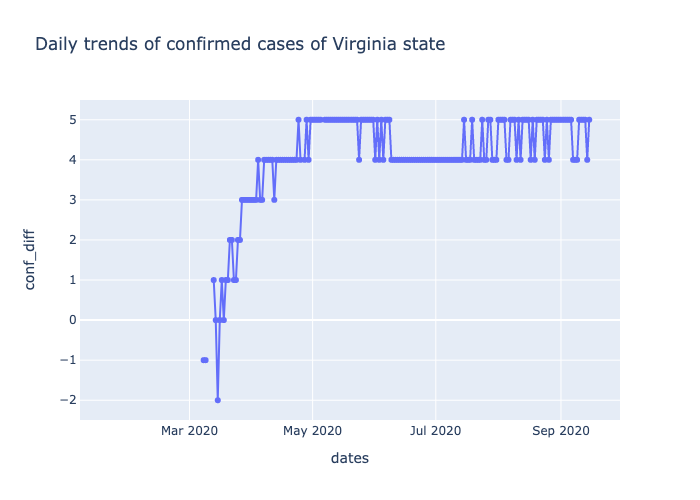

In [667]:
# Daily trends for confirmed cases for Virginia state
print('Variance: {}'.format(VA_New_Cases_agg[["conf_diff","deaths_diff"]].var()))

# log normalization of new confirmed cases. Log normalization is used here becasue the variance is very high in confirmed cases. 
VA = np.log(((VA_New_Cases_agg.set_index('dates')[["conf_diff","deaths_diff"]]/population_VA)*1000000)).round().reset_index()
fig = px.line(VA, x="dates", y="conf_diff", title='Daily trends of confirmed cases of Virginia state').update_traces(mode='lines+markers')
# fig.show()
imgg = pio.to_image(fig,format='png')
Image(imgg)

###   - Daily trends for deaths of Virginia state

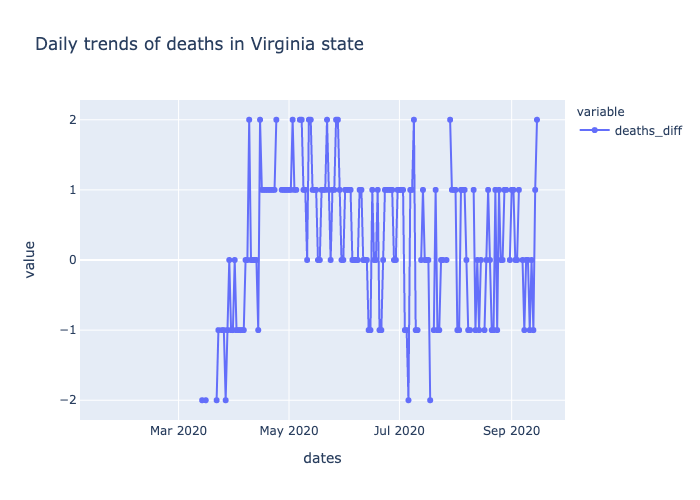

In [668]:
# Daily trends for deaths of Virginia state
# Normalized by population
fig = px.line(VA, x="dates", y=["deaths_diff"], title='Daily trends of deaths in Virginia state').update_traces(mode='lines+markers')
# fig.show()
imgg = pio.to_image(fig,format='png')
Image(imgg)

###    - Daily trends for 5 counties of Virginia state 
   ### - confirmed cases
        - Daily trends are computed by first finding number of new cases and deaths
        - New cases and deaths are then normalized by population per 1,000,000 and natural log  

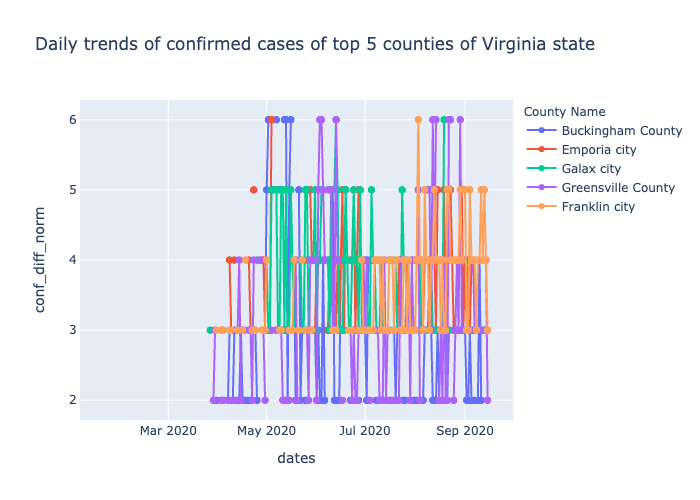

In [669]:
conf_countyname = conf_countyname.drop_duplicates()
selected = COVID19_VA_new_cases[COVID19_VA_new_cases['County Name'].isin(conf_countyname)].copy()

# new cases, normalize by population
selected['conf_diff_norm'] = np.log(((selected['conf_diff']/selected['population'])*100000)).round()
selected['deaths_diff_norm'] = (((selected['deaths_diff']/selected['population'])*100000)).round()

# sorting by dates is very important
selected = selected.sort_values('dates')
fig = px.line(selected, x="dates", y="conf_diff_norm", color= "County Name",title='Daily trends of confirmed cases of top 5 counties of Virginia state').update_traces(mode='lines+markers')
# fig.show()
imgg = pio.to_image(fig,format='png')
Image(imgg)

### - Daily trends of deaths for 5 counties of VA

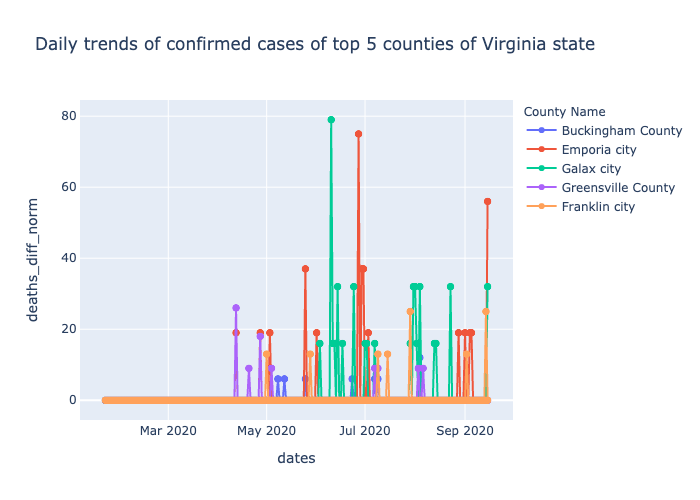

In [670]:
fig = px.line(selected, x="dates", y="deaths_diff_norm", color= "County Name",title='Daily trends of confirmed cases of top 5 counties of Virginia state').update_traces(mode='lines+markers')
# fig.show()
imgg = pio.to_image(fig,format='png')
Image(imgg)

## Task 2

## - Fit a distribution to the number of COVID-19 cases of a state.
    -- Graphically plot the distribution and describe the distribution statistics.
        -Distribution Statistics after normalizing by population: 
            mean: 62.78991596638655, variance: 2385.010530794596, Skewness: 0.18380211231026353,
            Kurtosis: -0.6943953307222666, Std: 48.83656960510838
             
    -- Describe why the distribution was choosen and its statistics in the report and the notebook.
        - Poisson distribution was chosen for the following reasons:
           - the dataset is discrete and we know how many times an event has occured over certain time period.
           - dataset is random and independently collected. There is no bias associated with this data.
           - mean: 62.78991596638655, variance: 2385.010530794596, Skewness: 0.18380211231026353,
             Kurtosis: -0.6943953307222666, Std: 48.83656960510838

## Distribution for Virginia State

Variance : 
conf_diff      110323.545527
deaths_diff       135.816757
dtype: float64

Distribution Statistics after normalizing by population:
mean: 62.78991596638655, variance: 2385.010530794596, Skewness: 0.18380211231026353, Kurtosis: -0.6943953307222666, Std: 48.83656960510838


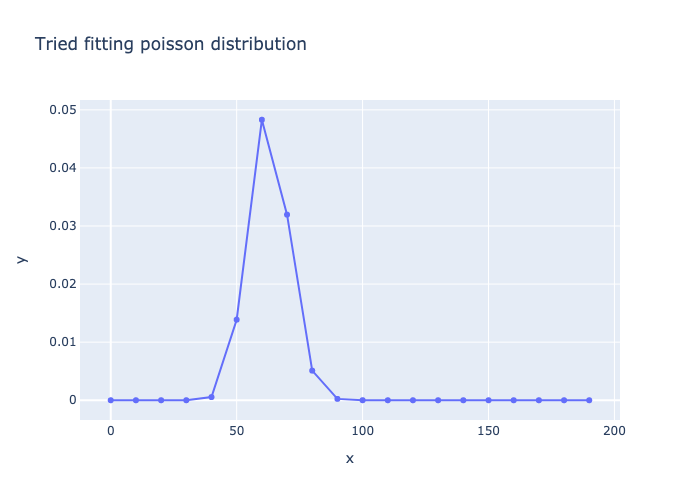

In [671]:
print('Variance : \n{}'.format(VA_New_Cases_agg[['conf_diff','deaths_diff']].var()))
VA_New_Cases_agg = VA_New_Cases_agg.fillna(0)
# print('Variance in data: \n',VA_New_Cases.var())
df = ((VA_New_Cases_agg['conf_diff']/population_VA)*1000000).round()
mean = df.mean()
var = df.var()
skew1 = skew(df)   
kurt = kurtosis(df)
std = st.stdev(df)
print('\nDistribution Statistics after normalizing by population:\nmean: {}, variance: {}, Skewness: {}, Kurtosis: {}, Std: {}'.format(mean,var,skew1,kurt,std))

# VA_New_Cases.head(50)
fig0 = px.histogram(df, x="conf_diff", nbins=30)
fig0.show()

# Tried poisson distribution
x = np.arange(0,200,10)
y = poisson.pmf(mu=mean,k=x)
fig2 = px.line(x=x,y=poisson.pmf(mu=mean,k=x), title='Tried fitting poisson distribution').update_traces(mode='lines+markers')
# fig2.show()
imgg2 = pio.to_image(fig2,format='png')
Image(imgg2)

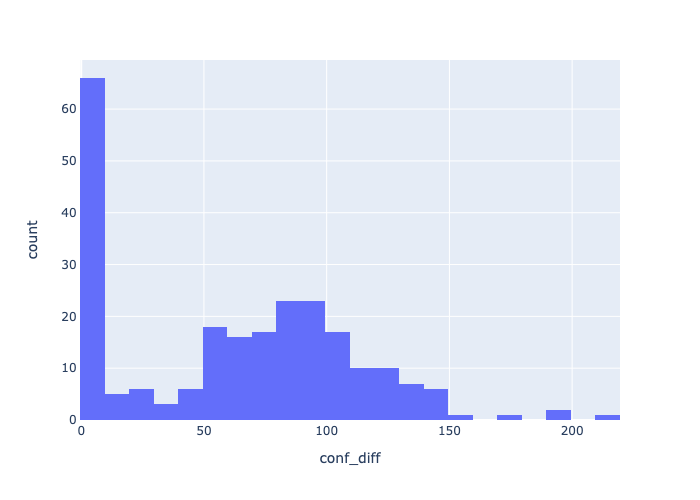

In [672]:
# plotting the histogram image
imgg0 = pio.to_image(fig0,format='png')
Image(imgg0)

## - Model a poisson distribution of COVID-19 cases and deaths of a state and compare to other 5 states. Number of new cases and deaths per 1,000,000 populations.
       - Compared states "VA" with "LA", "CA", "FL", "SC", "ME"

In [673]:
# normalized by population (these are calculated earlier in the notebook and used here) 
df_all_states.set_index('State',inplace=True)

## Model poisson distribution for confirmed cases

Distribution Statistics for State Virginia
mean: 63.0, Variance: 63.0, Skewness: 0.12598815766974242, Kurtosis: 0.015873015873015872


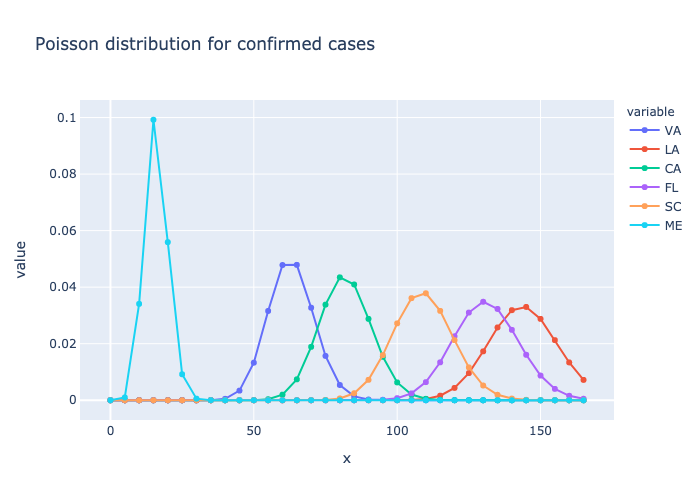

In [674]:
# model poisson distribution for confirmed cases
x = np.arange(0,170,5)
mu = df_all_states.loc['VA','conf_mean']
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print('Distribution Statistics for State Virginia\nmean: {}, Variance: {}, Skewness: {}, Kurtosis: {}'.format(mean,var,skew,kurt))
mu1 = df_all_states.loc['LA','conf_mean']
mu2 = df_all_states.loc['CA','conf_mean']
mu3 = df_all_states.loc['FL','conf_mean']
mu4 = df_all_states.loc['SC','conf_mean']
mu5 = df_all_states.loc['ME','conf_mean']
d={'VA': poisson.pmf(x,mu), 'LA': poisson.pmf(x,mu1),'CA': poisson.pmf(x,mu2), 'FL': poisson.pmf(x,mu3),'SC': poisson.pmf(x,mu4),'ME': poisson.pmf(x,mu5) }
ddf = pd.DataFrame(data=d)
fig = px.scatter(ddf,x=x, y=['VA','LA','CA','FL','SC','ME'], title='Poisson distribution for confirmed cases').update_traces(mode='lines+markers')
# fig.show()
imgg = pio.to_image(fig,format='png')
Image(imgg)

## Model Poisson distribution for deaths

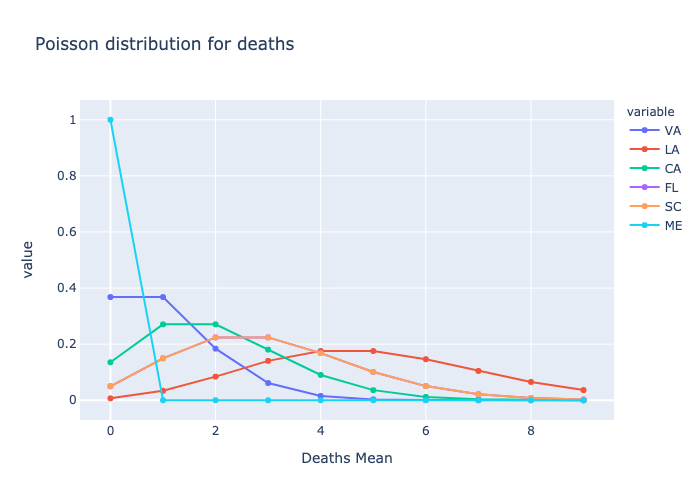

In [675]:
# model Poisson distribution for deaths
x = np.arange(0,10,1)
mu = df_all_states.loc['VA','deaths_mean']
mu1 = df_all_states.loc['LA','deaths_mean']
mu2 = df_all_states.loc['CA','deaths_mean']
mu3 = df_all_states.loc['FL','deaths_mean']
mu4 = df_all_states.loc['SC','deaths_mean']
mu5 = df_all_states.loc['ME','deaths_mean']
d={'VA': poisson.pmf(x,mu), 'LA': poisson.pmf(x,mu1),'CA': poisson.pmf(x,mu2), 'FL': poisson.pmf(x,mu3),'SC': poisson.pmf(x,mu4),'ME': poisson.pmf(x,mu5) }
ddf = pd.DataFrame(data=d)
fig = px.line(ddf,x=x, y=['VA','LA','CA','FL','SC','ME'], labels=dict(x="Deaths Mean"), title='Poisson distribution for deaths').update_traces(mode='lines+markers')
# fig.show()
imgg = pio.to_image(fig,format='png')
Image(imgg)

## - Model poisson distributions for North Carolina counties for COVID-19 in cases and deaths. Number of new cases and deaths per 1,000,000 populations.

In [676]:
# Find cunties with highest mean cases and deaths for North Carolina counties
merged_COVID19_NC = merged_COVID19[merged_COVID19['State']=='NC']

data=[]
grouped = merged_COVID19_NC.groupby('County Name')
for county, group in grouped:
    popu = group['population'].iloc[1]
    a2 = group[['confirmed_cases','deaths']].diff().add_suffix('_diff')
    mean1 = ((a2[['confirmed_cases_diff','deaths_diff']].mean()/popu)*1000000).reset_index().round()
    data.append([county,mean1.iloc[0,1],mean1.iloc[1,1]])
df_grupedby_county_NC = pd.DataFrame(data,columns=['County Name','conf_mean','deaths_mean'])
print('\n\nMean/Median/Mode for confirmed cases and death rates for each county in North Carolina State.\n')
print('\n "Duplin County","Montgomery County", "Robeson County","Tyrrell County" and "Sampson County" are the top 5 counties with highest confirmed cases. The rates shown below are per 1,000,000 population.\n')
temp_conf = df_grupedby_county_NC.sort_values(['conf_mean'], ascending=False)[['County Name','conf_mean']].head(6)
print(temp_conf)

print('\n "Columbus County", "Hertford County", "Duplin County", "Northampton County" and "Vance County" are the top 5 counties with highest deaths. The rates shown below are per 1,000,000 population.\n')
temp_deaths = df_grupedby_county_NC.sort_values(['deaths_mean'] ,ascending=False)[['County Name','deaths_mean']].head(5)
print(temp_deaths)





Mean/Median/Mode for confirmed cases and death rates for each county in North Carolina State.


 "Duplin County","Montgomery County", "Robeson County","Tyrrell County" and "Sampson County" are the top 5 counties with highest confirmed cases. The rates shown below are per 1,000,000 population.

              County Name  conf_mean
84  Statewide Unallocated        inf
30          Duplin County      151.0
61      Montgomery County      149.0
77         Robeson County      126.0
89         Tyrrell County      113.0
81         Sampson County      112.0

 "Columbus County", "Hertford County", "Duplin County", "Northampton County" and "Vance County" are the top 5 counties with highest deaths. The rates shown below are per 1,000,000 population.

           County Name  deaths_mean
23     Columbus County          4.0
45     Hertford County          4.0
30       Duplin County          4.0
65  Northampton County          4.0
91        Vance County          4.0


## model poisson distribution for confirmed cases for NC state

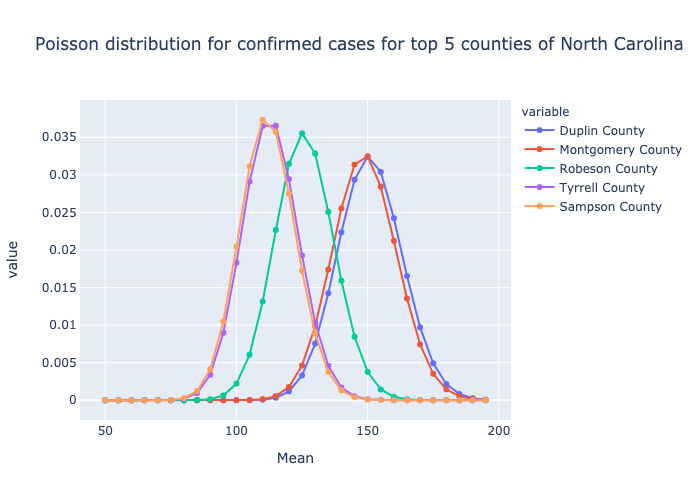

In [677]:
# model poisson distribution for confirmed cases fo NC state
x = np.arange(50,200,5)
# df_grupedby_county_NC.set_index('County Name', inplace=True)
mu = temp_conf.iloc[1,1]
mu1 = temp_conf.iloc[2,1]
mu2 = temp_conf.iloc[3,1]
mu3 = temp_conf.iloc[4,1]
mu4 = temp_conf.iloc[5,1]
d={temp_conf.iloc[1,0]: poisson.pmf(x,mu), temp_conf.iloc[2,0]: poisson.pmf(x,mu1),temp_conf.iloc[3,0]: poisson.pmf(x,mu2), temp_conf.iloc[4,0]: poisson.pmf(x,mu3),temp_conf.iloc[5,0]: poisson.pmf(x,mu4)}
ddf = pd.DataFrame(data=d)
fig = px.line(ddf,x=x, y=[temp_conf.iloc[1,0],temp_conf.iloc[2,0],temp_conf.iloc[3,0],temp_conf.iloc[4,0],temp_conf.iloc[5,0]], labels=dict(x="Mean"), title='Poisson distribution for confirmed cases for top 5 counties of North Carolina').update_traces(mode='lines+markers')
# fig.show()
imgg = pio.to_image(fig,format='png')
Image(imgg)

## model poisson distribution for deaths for NC state (All 5 counties are overlapping because of the same value of mean)

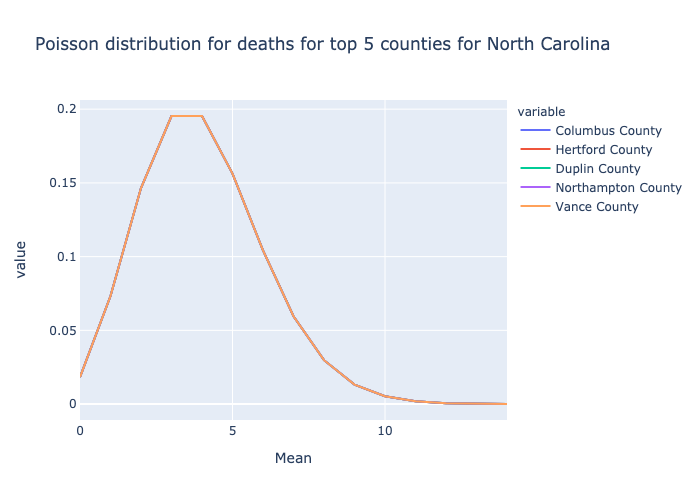

In [678]:
## model poisson distribution for deaths for NC state
x = np.arange(0,15)
# df_grupedby_county_NC.set_index('County Name', inplace=True)
mu = temp_deaths.iloc[0,1]
mu1 = temp_deaths.iloc[1,1]
mu2 = temp_deaths.iloc[2,1]
mu3 = temp_deaths.iloc[3,1]
mu4 = temp_deaths.iloc[4,1]
d={temp_deaths.iloc[0,0]: poisson.pmf(x,mu), temp_deaths.iloc[1,0]: poisson.pmf(x,mu1),temp_deaths.iloc[2,0]: poisson.pmf(x,mu2), temp_deaths.iloc[3,0]: poisson.pmf(x,mu3),temp_deaths.iloc[4,0]: poisson.pmf(x,mu4)}
ddf = pd.DataFrame(data=d)
fig = px.line(ddf,x=x, y=[temp_deaths.iloc[0,0],temp_deaths.iloc[1,0],temp_deaths.iloc[2,0],temp_deaths.iloc[3,0],temp_deaths.iloc[4,0]], labels=dict(x="Mean"), title='Poisson distribution for deaths for top 5 counties for North Carolina')
# fig.show() 
imgg = pio.to_image(fig,format='png')
Image(imgg)

# - Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.
###    - You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based data to enrichment for correlation. Between states you would need to aggregate to state level data and then perform correlation. 

In [679]:

# Read the COVID 19 hospital beds combined csv file
covid_beds = pd.read_csv("../Data/Output/COVID19_Enrichment_Combined.csv")
covid_beds.columns

# Dropping duplicate columns and unnecessary columns
covid_beds = covid_beds.drop(['Unnamed: 0'],axis=1).fillna(0)
covid_beds.head()



,countyFIPS,County Name,State,population,dates,confirmed_cases,deaths,OBJECTID,HOSPITAL_NAME,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,1001,Autauga County,AL,55869,1/22/20,0,0,18,Prattville Baptist Hospital,85.0,55.0,6,6,0.0,0.623113,30,2
1,1001,Autauga County,AL,55869,1/23/20,0,0,18,Prattville Baptist Hospital,85.0,55.0,6,6,0.0,0.623113,30,2
2,1001,Autauga County,AL,55869,1/24/20,0,0,18,Prattville Baptist Hospital,85.0,55.0,6,6,0.0,0.623113,30,2
3,1001,Autauga County,AL,55869,1/25/20,0,0,18,Prattville Baptist Hospital,85.0,55.0,6,6,0.0,0.623113,30,2
4,1001,Autauga County,AL,55869,1/26/20,0,0,18,Prattville Baptist Hospital,85.0,55.0,6,6,0.0,0.623113,30,2


## Choose data for state "VA" for finding correlation

In [680]:
# Choose data for state "VA" every day new cases
covid_beds_VA = covid_beds[covid_beds['State']=='VA'].copy()
covid_beds_VA_last_day = covid_beds_VA[covid_beds_VA['dates']=='9/15/20']
a1 = covid_beds_VA_last_day.groupby('County Name')['NUM_STAFFED_BEDS','NUM_LICENSED_BEDS','NUM_ICU_BEDS',\
                                                   'ADULT_ICU_BEDS','PEDI_ICU_BEDS','BED_UTILIZATION',\
                                                   'Potential_Increase_In_Bed_Capac','AVG_VENTILATOR_USAGE'].sum().reset_index()
a2 = covid_beds_VA_last_day.groupby('County Name')[['confirmed_cases','deaths','population']].mean()
covid_beds_VA_agg = a2.merge(a1,on='County Name').set_index('County Name')

# covid_beds_VA_agg = (covid_beds_VA_agg.div(a2['population'],axis=0))*10000
covid_beds_VA_agg

,confirmed_cases,deaths,population,NUM_STAFFED_BEDS,NUM_LICENSED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
County Name,,,,,,,,,,,
Accomack County,1161,19,32316,46.0,52.0,10,10,0.0,0.461584,6,3
Albemarle County,1140,19,109330,240.0,266.0,18,18,0.0,2.108420,26,8
Alleghany County,75,4,14860,95.0,205.0,10,10,0.0,0.159712,110,2
Arlington County,3759,145,236842,305.0,394.0,32,32,0.0,0.798123,89,11
Augusta County,436,7,75558,209.0,238.0,8,8,0.0,0.488392,29,5
...,...,...,...,...,...,...,...,...,...,...,...
Williamsburg City,167,7,14954,40.0,40.0,10,10,0.0,0.390205,0,2
Winchester city,471,4,28078,389.0,455.0,48,48,0.0,0.711617,66,21
Wise County,382,7,37383,68.0,134.0,8,8,0.0,0.190572,66,3


## correlation between confirmed cases, deaths and population from covid datset to enrichment dataset
    - We see strong/high correlation between Number of ICU beds and deaths, Adults ICU Beds and deaths. This correlation does not mean that if a county/state has more ICCU beds then there are more deaths. There are other factors too which can be combined with correlation information to give us some information. For example, we see that Number ICU Beds and deaths have high correlation, from that we can see that population and Number ICU beds also have high correlation. It means that a county with high population may have higher numbe rof ICU beds and becasue this is a high population county, the number of deaths are also higher.

In [681]:
# calculate correlation between enrichment dataset and covid combined dataset
correlation_matrix = covid_beds_VA_agg.corr().iloc[0:3,3:]
# .iloc[1:4,5:]
correlation_matrix

,NUM_STAFFED_BEDS,NUM_LICENSED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
confirmed_cases,0.816587,0.790786,0.843116,0.843116,0.728937,0.730741,0.411513,0.715642
deaths,0.866032,0.849222,0.902047,0.902047,0.799565,0.731348,0.494287,0.716091
population,0.866925,0.840978,0.885502,0.885502,0.774344,0.784248,0.444803,0.751453


## - Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against
    - Does higher higher confirmed cases lead to higher bed utilization?
    - Does higher deaths means higher ventilator usage?
    - Does higher Number of Staffed beds means higher confirmed cases?
    